In [ ]:
# Python Compatibility Fix - Run this cell first
# Fix for typing_extensions and Python version compatibility issues

import sys
import subprocess
import warnings
warnings.filterwarnings('ignore')

print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

def fix_typing_extensions():
    """Fix typing_extensions compatibility issues"""
    try:
        # First, try to upgrade typing_extensions
        print("Fixing typing_extensions compatibility...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'typing_extensions'])
        
        # Also upgrade related packages that might cause conflicts
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'pip', 'setuptools'])
        
        print("✓ typing_extensions updated successfully")
        
        # Test import
        try:
            from typing_extensions import TypeAliasType
            print("✓ TypeAliasType import test successful")
        except ImportError:
            print("⚠ TypeAliasType still not available, but continuing...")
            
    except Exception as e:
        print(f"Warning: Could not fix typing_extensions: {e}")
        print("Continuing with fallback compatibility mode...")

def fix_jupyter_compatibility():
    """Fix common Jupyter kernel issues"""
    try:
        # Update ipykernel and jupyter packages
        print("Updating Jupyter components...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'ipykernel', 'jupyter'])
        print("✓ Jupyter components updated")
    except Exception as e:
        print(f"Warning: Could not update Jupyter components: {e}")

# Apply fixes
fix_typing_extensions()
fix_jupyter_compatibility()

# Set up basic compatibility
try:
    # Try to import problematic modules early with error handling
    import typing_extensions
    print("✓ typing_extensions imported successfully")
except ImportError:
    print("⚠ typing_extensions import failed - using compatibility mode")
    # Create a minimal typing_extensions compatibility
    import types
    typing_extensions = types.ModuleType('typing_extensions')
    sys.modules['typing_extensions'] = typing_extensions

print("\n" + "="*50)
print("COMPATIBILITY SETUP COMPLETE")
print("="*50)
print("If you still see kernel issues, try:")
print("1. Restart the kernel")
print("2. Run: pip install --upgrade typing_extensions ipykernel")
print("3. Or switch to a different Python environment")
print("="*50)
try:
    # Try to import problematic modules early with error handling
    import typing_extensions
    print("✓ typing_extensions imported successfully")
except ImportError:
    print("⚠ typing_extensions import failed - using compatibility mode")
    # Create a minimal typing_extensions compatibility
    import types
    typing_extensions = types.ModuleType('typing_extensions')
    sys.modules['typing_extensions'] = typing_extensions

print("\n" + "="*50)
print("COMPATIBILITY SETUP COMPLETE")
print("="*50)
print("If you still see kernel issues, try:")
print("1. Restart the kernel")
print("2. Run: pip install --upgrade typing_extensions ipykernel")
print("3. Or switch to a different Python environment")
print("="*50)

Note: you may need to restart the kernel to use updated packages.
Python version: 3.13.3 (main, Apr  9 2025, 07:44:25) [GCC 14.2.1 20250207]
Python executable: /home/rajashekhar_sunkara/Documents/lung_analysis/.venv/bin/python
Fixing typing_extensions compatibility...
Note: you may need to restart the kernel to use updated packages.
Python version: 3.13.3 (main, Apr  9 2025, 07:44:25) [GCC 14.2.1 20250207]
Python executable: /home/rajashekhar_sunkara/Documents/lung_analysis/.venv/bin/python
Fixing typing_extensions compatibility...
✓ typing_extensions updated successfully
✓ TypeAliasType import test successful
Updating Jupyter components...
✓ typing_extensions updated successfully
✓ TypeAliasType import test successful
Updating Jupyter components...
✓ Jupyter components updated
✓ typing_extensions imported successfully

COMPATIBILITY SETUP COMPLETE
If you still see kernel issues, try:
1. Restart the kernel
2. Run: pip install --upgrade typing_extensions ipykernel
3. Or switch to a diff

# 🔧 Kernel Startup Issues - Solutions

If you're seeing `TypeAliasType` import errors or kernel startup failures, try these solutions **in order**:

## Solution 1: Run the compatibility fix above ⬆️
- Execute the cell above first
- Then restart the kernel (Kernel → Restart)

## Solution 2: Update packages manually
Open a terminal and run:
```bash
pip install --upgrade typing_extensions ipykernel jupyter
pip install --upgrade pip setuptools wheel
```

## Solution 3: Reset Python environment 
```bash
# If using pyenv
pyenv install 3.10.18
pyenv global 3.10.18

# Or create a new virtual environment
python -m venv lung_analysis_env
source lung_analysis_env/bin/activate  # Linux/Mac
# OR
lung_analysis_env\Scripts\activate     # Windows
pip install --upgrade pip setuptools wheel
```

## Solution 4: Alternative Python version
If Python 3.10.18 continues to have issues, try:
- Python 3.9.x (more stable for ML packages)
- Python 3.11.x (newer, good compatibility)

## After applying any solution:
1. **Restart VS Code completely**
2. **Select the correct Python interpreter**
3. **Restart the Jupyter kernel**
4. **Run cells in order**

---

In [2]:
# Minimal Package Installation - Fallback Mode
# Use this if the main installation cells fail

import sys
import subprocess

def minimal_install():
    """Install only essential packages for basic functionality"""
    essential_packages = [
        'numpy',
        'pandas', 
        'matplotlib',
        'scikit-learn'
    ]
    
    audio_packages = [
        'librosa',
        'soundfile'  # Alternative to complex audio dependencies
    ]
    
    ml_packages = [
        'tensorflow-cpu',  # CPU version is more stable
        'imbalanced-learn'
    ]
    
    print("Installing essential packages...")
    for package in essential_packages:
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✓ {package}")
        except:
            print(f"✗ {package} failed")
    
    print("\nInstalling audio packages...")
    for package in audio_packages:
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✓ {package}")
        except:
            print(f"✗ {package} failed - will use synthetic data")
    
    print("\nInstalling ML packages...")
    for package in ml_packages:
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✓ {package}")
        except:
            print(f"✗ {package} failed")

# Uncomment the line below if you want to run minimal installation
# minimal_install()

print("Minimal installation ready. The notebook will use fallback methods for any missing packages.")

Minimal installation ready. The notebook will use fallback methods for any missing packages.


In [6]:
# Cell to download and extract datasets - Fixed SSL issues
import os
import requests
import subprocess
import zipfile
import tarfile
import shutil
import ssl
import urllib3
import warnings

# Disable SSL warnings and certificate verification for problematic servers
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
warnings.filterwarnings('ignore')

try:
    from tqdm.notebook import tqdm
except ImportError:
    from tqdm import tqdm

def download_file(url, destination, chunk_size=8192):
    """Download a file from a URL with progress bar - Fixed for SSL issues"""
    print(f"Downloading {os.path.basename(destination)}...")
    
    # The ICBHI server has SSL certificate issues, so we need to disable verification
    response = requests.get(url, stream=True, verify=False, timeout=60)
    response.raise_for_status()
    
    total_size = int(response.headers.get('content-length', 0))
    print(f"File size: {total_size / (1024*1024):.1f} MB")
    
    with open(destination, 'wb') as f, tqdm(
            desc=f"Downloading {os.path.basename(destination)}",
            total=total_size,
            unit='B',
            unit_scale=True,
            unit_divisor=1024,
        ) as progress_bar:
        for chunk in response.iter_content(chunk_size=chunk_size):
            if chunk:
                f.write(chunk)
                progress_bar.update(len(chunk))
    
    print(f"✓ Successfully downloaded {destination}")
    return destination

def setup_datasets():
    """Main function to download and extract all required datasets"""
    print("Setting up datasets for the lung disease prediction project...")
    
    # Create directories if they don't exist
    os.makedirs('h', exist_ok=True)
    os.makedirs('Coswara-Data', exist_ok=True)
    
    # 1. Download and extract ICBHI dataset
    icbhi_url = "https://bhichallenge.med.auth.gr/sites/default/files/ICBHI_final_database/ICBHI_final_database.zip"
    icbhi_zip = "ICBHI_final_database.zip"
    
    if not os.path.exists(icbhi_zip) and not os.path.exists('h/101_1b1_Al_sc_Meditron.wav'):
        print("Downloading ICBHI dataset...")
        print("⚠️  Note: SSL verification disabled for this server due to certificate issues")
        
        try:
            download_file(icbhi_url, icbhi_zip)
            
            print("Extracting ICBHI dataset...")
            with zipfile.ZipFile(icbhi_zip, 'r') as zip_ref:
                zip_ref.extractall('h')
                print(f"✓ Extracted {len(zip_ref.namelist())} files")
            
            # Cleanup
            os.remove(icbhi_zip)
            print("✓ Cleaned up zip file")
            
        except Exception as e:
            print(f"❌ Download failed: {e}")
            print("🔄 Don't worry - you can continue with synthetic data")
            print("📥 Manual download: https://bhichallenge.med.auth.gr/ICBHI_2017_Challenge")
    else:
        print("✓ ICBHI dataset already exists.")
    
    # 2. Clone or update Coswara dataset repository
    try:
        if not os.path.exists('Coswara-Data/.git'):
            print("Cloning Coswara dataset repository...")
            subprocess.run(["git", "clone", "https://github.com/iiscleap/Coswara-Data.git"], 
                         check=True, timeout=300)
        else:
            print("Updating Coswara dataset repository...")
            subprocess.run(["git", "-C", "Coswara-Data", "pull"], 
                         check=True, timeout=120)
    except Exception as e:
        print(f"Git operation failed: {e}")
        print("Continuing without Coswara data...")
    
    # Process and extract the Coswara data
    process_coswara_dates = ['20210507', '20220224']  # Select specific dates to process for faster setup
    
    if not os.path.exists('Extracted_Coswara'):
        print("Processing selected Coswara data...")
        os.makedirs('Extracted_Coswara', exist_ok=True)
        
        for date in process_coswara_dates:
            date_folder = os.path.join('Coswara-Data', date)
            if os.path.exists(date_folder):
                output_folder = os.path.join('Extracted_Coswara', date)
                os.makedirs(output_folder, exist_ok=True)
                
                # Extract and copy files - note this is a simplified version
                try:
                    participants = [p for p in os.listdir(date_folder) 
                                  if os.path.isdir(os.path.join(date_folder, p))]
                    
                    for participant in participants[:20]:  # Limit for faster processing
                        src_path = os.path.join(date_folder, participant)
                        dst_path = os.path.join(output_folder, participant)
                        if not os.path.exists(dst_path):
                            shutil.copytree(src_path, dst_path)
                    
                    print(f"✓ Processed {min(len(participants), 20)} participants for {date}")
                except Exception as e:
                    print(f"Error processing {date}: {e}")
    else:
        print("✓ Coswara extracted data already exists.")

    print("✅ Dataset setup complete! Ready to continue with processing...")

# Run the dataset setup
setup_datasets()

Setting up datasets for the lung disease prediction project...
⚠️  Note: SSL verification disabled for this server due to certificate issues
File size: 1887.3 MB
File size: 1887.3 MB


KeyboardInterrupt: 

In [ ]:
# Enhanced package installation for Python 3.13+ compatibility
import sys
import subprocess
import importlib
import platform

def install_and_check_package(package_name, import_name=None, fallback_packages=None):
    """Install a package with fallback options and import verification"""
    if import_name is None:
        import_name = package_name.replace('-', '_')
    
    # Check if already installed
    try:
        importlib.import_module(import_name)
        print(f"✓ {package_name} already available")
        return True
    except ImportError:
        pass
    
    # Try main package
    try:
        cmd = [sys.executable, '-m', 'pip', 'install', package_name, '--quiet']
        result = subprocess.run(cmd, capture_output=True, text=True, timeout=180)
        if result.returncode == 0:
            print(f"✓ {package_name} installed successfully")
            return True
    except Exception as e:
        print(f"⚠️ Failed to install {package_name}: {e}")
    
    # Try fallback packages
    if fallback_packages:
        for fallback in fallback_packages:
            try:
                cmd = [sys.executable, '-m', 'pip', 'install', fallback, '--quiet']
                result = subprocess.run(cmd, capture_output=True, text=True, timeout=180)
                if result.returncode == 0:
                    print(f"✓ {fallback} (fallback) installed successfully")
                    return True
            except Exception as e:
                print(f"⚠️ Fallback {fallback} also failed: {e}")
    
    return False

print(f"🐍 Python {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")
print(f"💻 Platform: {platform.system()} {platform.release()}")
print("\n📦 Installing/checking packages...")

# Core packages (required)
core_packages = {
    'numpy': None,
    'pandas': None, 
    'scikit-learn': 'sklearn',
    'matplotlib': None,
    'seaborn': None,
    'tqdm': None,
    'joblib': None,
    'librosa': None,
    'imbalanced-learn': 'imblearn'
}

for package, import_name in core_packages.items():
    install_and_check_package(package, import_name)

# Deep learning frameworks (optional, with Python 3.13 compatibility)
print("\n🧠 Installing deep learning frameworks...")

# Try TensorFlow with fallbacks for Python 3.13+
if sys.version_info >= (3, 13):
    print("⚠️  Python 3.13+ detected - TensorFlow may not be fully supported yet")
    # For now, skip TensorFlow and use scikit-learn models
    tensorflow_available = False
else:
    tensorflow_available = install_and_check_package(
        'tensorflow', 
        'tensorflow',
        ['tensorflow-cpu']
    )

# Install PyTorch as an alternative (better Python 3.13 support)
pytorch_available = install_and_check_package(
    'torch', 
    'torch',
    ['torch --index-url https://download.pytorch.org/whl/cpu']
)

# Install additional audio processing packages
audio_packages = {
    'soundfile': None,
    'scipy': None,
    'pillow': 'PIL'
}

print("\n🔊 Installing audio processing packages...")
for package, import_name in audio_packages.items():
    install_and_check_package(package, import_name)

print("\n✅ Package installation complete!")
print(f"🔹 TensorFlow available: {tensorflow_available}")
print(f"🔹 PyTorch available: {pytorch_available}")

if not tensorflow_available and not pytorch_available:
    print("⚠️  No deep learning framework available - will use scikit-learn models only")
elif pytorch_available and not tensorflow_available:
    print("🔥 Using PyTorch for deep learning models")
else:
    print("🔥 Using TensorFlow for deep learning models")

In [ ]:
# Install required packages with cross-platform compatibility
import sys
import subprocess
import importlib
import platform

print(f"Installing packages for: {platform.system()} {platform.release()}")
print(f"Python version: {sys.version}")

# List of required packages with fallback options
packages = [
    'librosa',
    'numpy', 
    'pandas', 
    'scikit-learn',
    'matplotlib', 
    'seaborn', 
    'tqdm',
    'joblib'
]

# Advanced packages (may need special handling)
advanced_packages = [
    'imbalanced-learn',
    'tensorflow',
]

def install_package(package_name, upgrade=True):
    """Install a package with error handling"""
    try:
        cmd = [sys.executable, '-m', 'pip', 'install']
        if upgrade:
            cmd.append('--upgrade')
        cmd.append(package_name)
        
        result = subprocess.run(cmd, capture_output=True, text=True, timeout=300)
        if result.returncode == 0:
            print(f"✓ {package_name} installed successfully")
            return True
        else:
            print(f"✗ Failed to install {package_name}: {result.stderr}")
            return False
    except Exception as e:
        print(f"✗ Error installing {package_name}: {e}")
        return False

def check_package(package_name):
    """Check if a package is already installed"""
    try:
        importlib.import_module(package_name)
        return True
    except ImportError:
        return False

# Install core packages
print("Installing core packages...")
for package in packages:
    if not check_package(package):
        install_package(package)
    else:
        print(f"✓ {package} already installed")

# Install advanced packages
print("\nInstalling advanced packages...")
for package in advanced_packages:
    if package == 'imbalanced-learn':
        if not check_package('imblearn'):
            install_package('imbalanced-learn')
    elif package == 'tensorflow':
        if not check_package('tensorflow'):
            if not install_package('tensorflow'):
                print("Trying tensorflow-cpu as fallback...")
                install_package('tensorflow-cpu')
    else:
        if not check_package(package):
            install_package(package)

print("\nImporting packages with error handling...")

# Core imports
try:
    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import json
    import warnings
    warnings.filterwarnings('ignore')
    print("✓ Core packages imported successfully")
except ImportError as e:
    print(f"✗ Error importing core packages: {e}")
    raise

# Audio processing
try:
    import librosa
    print("✓ librosa imported successfully")
except ImportError as e:
    print(f"✗ librosa import failed: {e}")
    print("Please install librosa manually: pip install librosa")
    raise

# Machine learning packages
try:
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
    print("✓ scikit-learn imported successfully")
except ImportError as e:
    print(f"✗ scikit-learn import failed: {e}")
    raise

# Deep learning
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization, LSTM
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
    print(f"✓ TensorFlow {tf.__version__} imported successfully")
except ImportError as e:
    print(f"✗ TensorFlow import failed: {e}")
    print("Please install TensorFlow manually: pip install tensorflow")
    raise

# Imbalanced learning
try:
    from imblearn.over_sampling import SMOTE, ADASYN
    from sklearn.utils import resample
    print("✓ imbalanced-learn imported successfully")
    SMOTE_AVAILABLE = True
    ADASYN_AVAILABLE = True
except ImportError as e:
    print(f"Warning: imbalanced-learn not available: {e}")
    print("Will use basic resampling methods instead")
    SMOTE_AVAILABLE = False
    ADASYN_AVAILABLE = False

# Progress bars
try:
    from tqdm.notebook import tqdm
    print("✓ tqdm notebook imported successfully")
except ImportError:
    try:
        from tqdm import tqdm
        print("✓ tqdm imported successfully")
    except ImportError as e:
        print(f"Warning: tqdm not available: {e}")
        # Define a dummy tqdm class
        class tqdm:
            def __init__(self, iterable=None, desc=None, total=None, **kwargs):
                self.iterable = iterable
                self.desc = desc
            def __iter__(self):
                if self.iterable:
                    for item in self.iterable:
                        yield item
            def __enter__(self):
                return self
            def __exit__(self, *args):
                pass
            def update(self, n=1):
                pass

# Joblib
try:
    from joblib import Parallel, delayed, dump, load
    print("✓ joblib imported successfully")
except ImportError as e:
    print(f"Warning: joblib not available: {e}")

print("\n" + "="*50)
print("PACKAGE SETUP COMPLETE")
print("="*50)
    
    import time
    start_time = time.time()
    
    # Method 1: Try with requests and enhanced progress tracking
    if REQUESTS_AVAILABLE:
        try:
            print("Attempting download with requests...")
            
            # Try with requests first - shorter timeout for initial connection
            response = requests.get(url, stream=True, verify=False, timeout=60)
            response.raise_for_status()
            
            total_size = int(response.headers.get('content-length', 0))
            print(f"File size: {total_size / (1024*1024):.1f} MB")
            
            downloaded = 0
            last_update = time.time()
            
            with open(destination, 'wb') as f:
                if TQDM_AVAILABLE:
                    # Use tqdm progress bar
                    with tqdm(
                            desc=f"Downloading {os.path.basename(destination)}",
                            total=total_size,
                            unit='B',
                            unit_scale=True,
                            unit_divisor=1024,
                        ) as progress_bar:
                        for chunk in response.iter_content(chunk_size=chunk_size):
                            if chunk:
                                f.write(chunk)
                                downloaded += len(chunk)
                                progress_bar.update(len(chunk))
                                
                                # Timeout check
                                if time.time() - start_time > timeout:
                                    raise Exception(f"Download timeout after {timeout} seconds")
                else:
                    # Manual progress tracking
                    for chunk in response.iter_content(chunk_size=chunk_size):
                        if chunk:
                            f.write(chunk)
                            downloaded += len(chunk)
                            
                            # Update progress every 2 seconds
                            current_time = time.time()
                            if current_time - last_update > 2:
                                if total_size > 0:
                                    percent = (downloaded / total_size) * 100
                                    speed = downloaded / (current_time - start_time) / 1024  # KB/s
                                    print(f"\rProgress: {percent:.1f}% ({downloaded/(1024*1024):.1f}/{total_size/(1024*1024):.1f} MB) - {speed:.1f} KB/s", end='', flush=True)
                                last_update = current_time
                            
                            # Timeout check
                            if current_time - start_time > timeout:
                                raise Exception(f"Download timeout after {timeout} seconds")
                    
                    print()  # New line after progress
            
            elapsed = time.time() - start_time
            print(f"✓ Successfully downloaded {destination} in {elapsed:.1f}s")
            return destination
            
        except Exception as e:
            print(f"✗ Requests method failed: {e}")
    
    # Method 2: Fallback to urllib with enhanced progress
    try:
        print("Trying urllib fallback...")
        ssl_context = ssl.create_default_context()
        ssl_context.check_hostname = False
        ssl_context.verify_mode = ssl.CERT_NONE
        
        with urllib.request.urlopen(url, context=ssl_context, timeout=60) as response:
            total_size = int(response.headers.get('content-length', 0))
            print(f"File size: {total_size / (1024*1024):.1f} MB")
            
            downloaded = 0
            last_update = time.time()
            start_time = time.time()
            
            with open(destination, 'wb') as f:
                while True:
                    chunk = response.read(chunk_size)
                    if not chunk:
                        break
                    f.write(chunk)
                    downloaded += len(chunk)
                    
                    # Progress update every 2 seconds
                    current_time = time.time()
                    if current_time - last_update > 2:
                        if total_size > 0:
                            percent = (downloaded / total_size) * 100
                            speed = downloaded / (current_time - start_time) / 1024  # KB/s
                            print(f"\rProgress: {percent:.1f}% ({downloaded/(1024*1024):.1f}/{total_size/(1024*1024):.1f} MB) - {speed:.1f} KB/s", end='', flush=True)
                        last_update = current_time
                    
                    # Timeout check
                    if current_time - start_time > timeout:
                        raise Exception(f"Download timeout after {timeout} seconds")
        
        elapsed = time.time() - start_time
        print(f"\n✓ Successfully downloaded {destination} in {elapsed:.1f}s")
        return destination
        
    except Exception as e:
        print(f"✗ urllib method also failed: {e}")
        
    # Method 3: Alternative smaller file or skip
    print("All download methods failed. Options:")
    print("1. Check your internet connection")
    print("2. Try downloading manually from: https://bhichallenge.med.auth.gr/ICBHI_2017_Challenge")
    print("3. Continue with synthetic data (notebook will generate fake data)")
    raise Exception(f"All download methods failed for {url}")

def download_file(url, destination, chunk_size=8192):
    """Wrapper for backward compatibility"""
    return download_file_robust(url, destination, chunk_size)

def setup_datasets():
    """Main function to download and extract all required datasets - Cross-platform compatible"""
    print("Setting up datasets for the lung disease prediction project...")
    print(f"Current working directory: {os.getcwd()}")
    
    # Quick option to skip downloads for testing
    SKIP_DOWNLOADS = False  # Set to True to skip downloads and use synthetic data
    
    if SKIP_DOWNLOADS:
        print("🚀 SKIP_DOWNLOADS is True - using synthetic data only")
        print("💡 To download real data, set SKIP_DOWNLOADS = False above")
        return
    
    # Create directories if they don't exist
    os.makedirs('h', exist_ok=True)
    os.makedirs('Coswara-Data', exist_ok=True)
    
    # 1. Download and extract ICBHI dataset with multiple fallback options
    icbhi_url = "https://bhichallenge.med.auth.gr/sites/default/files/ICBHI_final_database/ICBHI_final_database.zip"
    icbhi_zip = "ICBHI_final_database.zip"
    
    # Check if data already exists
    sample_files = ['101_1b1_Al_sc_Meditron.wav', '101_1b1_Al_sc_Litt3200.wav', '101_1b1_Ar_sc_Meditron.wav']
    data_exists = any(os.path.exists(os.path.join('h', f)) for f in sample_files)
    
    if not os.path.exists(icbhi_zip) and not data_exists:
        print("Downloading ICBHI dataset...")
        print("⚠️  This is a large file (~600MB) and may take 10-20 minutes depending on your connection.")
        print("💡 If download fails or takes too long, you can:")
        print("   1. Stop the cell execution (Interrupt kernel)")
        print("   2. Continue - the notebook will use synthetic data")
        print("   3. Download manually from: https://bhichallenge.med.auth.gr/ICBHI_2017_Challenge")
        print()
        
        try:
            download_file_robust(icbhi_url, icbhi_zip, timeout=1200)  # 20 minute timeout
            
            print("Extracting ICBHI dataset...")
            with zipfile.ZipFile(icbhi_zip, 'r') as zip_ref:
                # Extract with better error handling
                try:
                    zip_ref.extractall('h')
                    print(f"✓ Extracted {len(zip_ref.namelist())} files")
                except Exception as e:
                    print(f"Extraction error: {e}")
                    # Try extracting individual files
                    extracted_count = 0
                    for file in zip_ref.namelist():
                        try:
                            zip_ref.extract(file, 'h')
                            extracted_count += 1
                        except Exception as file_error:
                            print(f"Failed to extract {file}: {file_error}")
                    print(f"✓ Extracted {extracted_count} files successfully")
            
            # Cleanup
            if os.path.exists(icbhi_zip):
                os.remove(icbhi_zip)
                print("✓ Cleaned up temporary zip file")
                
        except KeyboardInterrupt:
            print("\n⚠️ Download interrupted by user")
            print("Continuing with synthetic data generation...")
            # Clean up partial download
            if os.path.exists(icbhi_zip):
                os.remove(icbhi_zip)
        except Exception as e:
            print(f"❌ ICBHI download failed: {e}")
            print("🔄 Don't worry! The notebook will continue with synthetic data.")
            print("📥 To get real data later, download manually from:")
            print("   https://bhichallenge.med.auth.gr/ICBHI_2017_Challenge")
            print("   Extract to the 'h' directory in this folder")
            # Clean up partial download
            if os.path.exists(icbhi_zip):
                os.remove(icbhi_zip)
    else:
        print("✓ ICBHI dataset already exists.")
    
    # 2. Clone or update Coswara dataset repository with cross-platform git handling
    def check_git_available():
        try:
            result = subprocess.run(['git', '--version'], capture_output=True, text=True, timeout=10)
            return result.returncode == 0
        except (subprocess.SubprocessError, FileNotFoundError):
            return False
    
    if check_git_available():
        try:
            if not os.path.exists('Coswara-Data/.git'):
                print("Cloning Coswara dataset repository...")
                # Use cross-platform git command
                git_cmd = ['git', 'clone', 'https://github.com/iiscleap/Coswara-Data.git']
                if platform.system() == "Windows":
                    result = subprocess.run(git_cmd, shell=True, check=True, timeout=300)
                else:
                    result = subprocess.run(git_cmd, check=True, timeout=300)
                print("Coswara repository cloned successfully")
            else:
                print("Updating Coswara dataset repository...")
                # Update with cross-platform commands
                if platform.system() == "Windows":
                    subprocess.run(['git', '-C', 'Coswara-Data', 'pull'], shell=True, check=True, timeout=120)
                else:
                    subprocess.run(['git', '-C', 'Coswara-Data', 'pull'], check=True, timeout=120)
                print("Coswara repository updated successfully")
        except subprocess.TimeoutExpired:
            print("Git operation timed out. You may need to clone manually:")
            print("git clone https://github.com/iiscleap/Coswara-Data.git")
        except Exception as e:
            print(f"Git operation failed: {e}")
            print("You may need to clone the Coswara repository manually:")
            print("git clone https://github.com/iiscleap/Coswara-Data.git")
    else:
        print("Git not available. Please install git or download Coswara data manually:")
        print("https://github.com/iiscleap/Coswara-Data")
    
    # Process and extract the Coswara data with better error handling
    process_coswara_dates = ['20210507', '20220224']  # Select specific dates to process for faster setup
    
    if not os.path.exists('Extracted_Coswara'):
        print("Processing selected Coswara data...")
        os.makedirs('Extracted_Coswara', exist_ok=True)
        
        processed_any = False
        for date in process_coswara_dates:
            date_folder = os.path.join('Coswara-Data', date)
            if os.path.exists(date_folder):
                print(f"Processing date: {date}")
                output_folder = os.path.join('Extracted_Coswara', date)
                os.makedirs(output_folder, exist_ok=True)
                
                # Extract and copy files with better error handling
                participants = []
                try:
                    participants = [p for p in os.listdir(date_folder) if os.path.isdir(os.path.join(date_folder, p))]
                except OSError as e:
                    print(f"Error reading directory {date_folder}: {e}")
                    continue
                
                copied_count = 0
                for participant in participants[:50]:  # Limit to first 50 for faster processing
                    src_path = os.path.join(date_folder, participant)
                    dst_path = os.path.join(output_folder, participant)
                    
                    if not os.path.exists(dst_path):
                        try:
                            shutil.copytree(src_path, dst_path)
                            copied_count += 1
                        except Exception as e:
                            print(f"Error copying {participant}: {e}")
                            continue
                
                print(f"Processed {copied_count} participants for {date}")
                processed_any = True
            else:
                print(f"Date folder {date} not found in Coswara-Data")
        
        if not processed_any:
            print("Warning: No Coswara data was processed. Creating minimal structure...")
            # Create a minimal structure so the notebook can continue
            os.makedirs(os.path.join('Extracted_Coswara', 'sample'), exist_ok=True)
    else:
        print("Coswara extracted data already exists.")

    # Verify what we have
    h_files = []
    if os.path.exists('h'):
        h_files = [f for f in os.listdir('h') if f.endswith('.wav')]
    
    coswara_files = []
    if os.path.exists('Extracted_Coswara'):
        for root, dirs, files in os.walk('Extracted_Coswara'):
            coswara_files.extend([f for f in files if f.endswith('.wav')])
    
    print(f"\nDataset Summary:")
    print(f"ICBHI audio files found: {len(h_files)}")
    print(f"Coswara audio files found: {len(coswara_files)}")
    
    if len(h_files) == 0 and len(coswara_files) == 0:
        print("WARNING: No audio files found. You may need to download datasets manually.")
        print("Creating sample synthetic data for demonstration...")
        # We'll handle this in the processing functions
    
    print("Dataset setup complete! Ready to continue with processing...")

# Run the dataset setup with error handling
try:
    setup_datasets()
except Exception as e:
    print(f"Setup failed with error: {e}")
    print("You can continue with manual data setup or synthetic data generation.")

In [4]:
# Cell to run extract_data.py script to process datasets
# This cell executes the dataset extraction script
import subprocess
import sys

if os.path.exists('extract_data.py'):
    print("Running extract_data.py to process the datasets...")
    try:
        # Execute the script directly in the notebook
        %run extract_data.py
    except Exception as e:
        print(f"Error running extract_data.py: {e}")
        print("Attempting to run using subprocess...")
        try:
            # Alternative approach using subprocess
            result = subprocess.run([sys.executable, 'extract_data.py'], 
                                    check=True, 
                                    capture_output=True, 
                                    text=True)
            print(result.stdout)
        except subprocess.CalledProcessError as e:
            print(f"Error: {e}")
            print(f"Output: {e.output}")
else:
    print("extract_data.py not found. Using built-in processing...")
    
    # If the extract_data.py is not available, define minimal processing here
    def minimal_extraction():
        """Basic extraction function if the script is not available"""
        # Create output directories
        os.makedirs('Extracted_ICBHI', exist_ok=True)
        os.makedirs('Extracted_Coswara', exist_ok=True)
        
        # Check if input directories exist
        if os.path.exists('h'):
            print("Processing some ICBHI files...")
            # Process a few files as demonstration
            import librosa
            import numpy as np
            from tqdm.notebook import tqdm
            
            wav_files = [f for f in os.listdir('h') if f.endswith('.wav')][:10]  # Process just 10 files
            for wav_file in tqdm(wav_files, desc="Processing ICBHI sample"):
                try:
                    audio, sr = librosa.load(os.path.join('h', wav_file), sr=22050, duration=10)
                    librosa.save(os.path.join('Extracted_ICBHI', wav_file), audio, sr=sr)
                except Exception as e:
                    print(f"Error processing {wav_file}: {e}")
        
        print("Basic extraction completed.")
    
    # Run the minimal extraction
    minimal_extraction()

Running extract_data.py to process the datasets...


ModuleNotFoundError: No module named 'librosa'

In [5]:
# Install required packages with cross-platform compatibility
import sys
import subprocess
import importlib
import platform

print(f"Installing packages for: {platform.system()} {platform.release()}")
print(f"Python version: {sys.version}")

# List of required packages with fallback options
packages = [
    'librosa',
    'numpy', 
    'pandas', 
    'scikit-learn',
    'matplotlib', 
    'seaborn', 
    'tqdm',
    'joblib'
]

# Advanced packages (may need special handling)
advanced_packages = [
    'imblearn',  # imbalanced-learn
    'tensorflow',
]

# Optional packages for enhanced functionality
optional_packages = [
    ('torch', 'PyTorch for additional model support'),
    ('torchaudio', 'PyTorch audio processing'),
]

def install_package(package_name, upgrade=True):
    """Install a package with error handling"""
    try:
        cmd = [sys.executable, '-m', 'pip', 'install']
        if upgrade:
            cmd.append('--upgrade')
        cmd.append(package_name)
        
        result = subprocess.run(cmd, capture_output=True, text=True, timeout=300)
        if result.returncode == 0:
            print(f"✓ {package_name} installed successfully")
            return True
        else:
            print(f"✗ Failed to install {package_name}: {result.stderr}")
            return False
    except Exception as e:
        print(f"✗ Error installing {package_name}: {e}")
        return False

def check_package(package_name):
    """Check if a package is already installed"""
    try:
        importlib.import_module(package_name)
        return True
    except ImportError:
        return False

# Install core packages
print("Installing core packages...")
for package in packages:
    if not check_package(package):
        install_package(package)
    else:
        print(f"✓ {package} already installed")

# Install advanced packages with special handling
print("\nInstalling advanced packages...")
for package in advanced_packages:
    if package == 'imblearn':
        if not check_package('imblearn'):
            # Try the correct package name
            install_package('imbalanced-learn')
    elif package == 'tensorflow':
        if not check_package('tensorflow'):
            # Try different TensorFlow versions
            if not install_package('tensorflow'):
                print("Trying tensorflow-cpu as fallback...")
                install_package('tensorflow-cpu')
    else:
        if not check_package(package):
            install_package(package)

# Install optional packages
print("\nInstalling optional packages...")
for package, description in optional_packages:
    if not check_package(package.split('[')[0]):  # Handle package[extra] syntax
        print(f"Installing {package} - {description}")
        success = install_package(package)
        if not success:
            print(f"Warning: {package} installation failed, continuing without it...")

print("\nImporting packages with error handling...")

# Core imports with error handling
try:
    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import json
    import warnings
    warnings.filterwarnings('ignore')
    print("✓ Core packages imported successfully")
except ImportError as e:
    print(f"✗ Error importing core packages: {e}")
    raise

# Audio processing
try:
    import librosa
    print("✓ librosa imported successfully")
except ImportError as e:
    print(f"✗ librosa import failed: {e}")
    print("Please install librosa manually: pip install librosa")
    raise

# Machine learning packages
try:
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
    print("✓ scikit-learn imported successfully")
except ImportError as e:
    print(f"✗ scikit-learn import failed: {e}")
    raise

# Deep learning
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization, LSTM
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
    print(f"✓ TensorFlow {tf.__version__} imported successfully")
except ImportError as e:
    print(f"✗ TensorFlow import failed: {e}")
    print("Please install TensorFlow manually: pip install tensorflow")
    raise

# Imbalanced learning
try:
    from imblearn.over_sampling import SMOTE, ADASYN
    from sklearn.utils import resample
    print("✓ imbalanced-learn imported successfully")
except ImportError as e:
    print(f"Warning: imbalanced-learn not available: {e}")
    print("Will use basic resampling methods instead")
    SMOTE = None
    ADASYN = None

# Progress bars
try:
    from tqdm.notebook import tqdm
    print("✓ tqdm notebook imported successfully")
except ImportError:
    try:
        from tqdm import tqdm
        print("✓ tqdm imported successfully")
    except ImportError as e:
        print(f"Warning: tqdm not available: {e}")
        # Define a dummy tqdm class
        class tqdm:
            def __init__(self, iterable=None, desc=None, total=None, **kwargs):
                self.iterable = iterable
                self.desc = desc
            def __iter__(self):
                if self.iterable:
                    for item in self.iterable:
                        yield item
            def __enter__(self):
                return self
            def __exit__(self, *args):
                pass
            def update(self, n=1):
                pass

# Joblib for model saving
try:
    from joblib import Parallel, delayed, dump, load
    print("✓ joblib imported successfully")
except ImportError as e:
    print(f"Warning: joblib not available: {e}")

# Optional PyTorch
try:
    import torch
    import torchaudio
    print(f"✓ PyTorch {torch.__version__} imported successfully")
except ImportError:
    print("Note: PyTorch not available (optional)")

print("\n" + "="*50)
print("PACKAGE SETUP COMPLETE")
print("="*50)
print("All required packages are ready for the lung disease classification notebook.")
print("If any critical packages failed to import, please install them manually.")
print("="*50)

Installing packages for: Linux 6.14.9-arch1-1
Python version: 3.13.3 (main, Apr  9 2025, 07:44:25) [GCC 14.2.1 20250207]
Installing core packages...
✓ librosa installed successfully
✓ numpy already installed
✓ librosa installed successfully
✓ numpy already installed
✓ pandas installed successfully
✓ pandas installed successfully
✓ scikit-learn installed successfully
✓ scikit-learn installed successfully
✓ matplotlib installed successfully
✓ matplotlib installed successfully
✓ seaborn installed successfully
✓ tqdm already installed
✓ joblib already installed

Installing advanced packages...
✓ seaborn installed successfully
✓ tqdm already installed
✓ joblib already installed

Installing advanced packages...
✓ imbalanced-learn installed successfully
✓ imbalanced-learn installed successfully
✗ Failed to install tensorflow: ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow

Trying tensorflow-c

KeyboardInterrupt: 

In [ ]:
# Enhanced constants for audio processing
SAMPLE_RATE = 22050
MAX_LENGTH = 220500  # 10 seconds of audio
N_MFCC = 40
N_MELS = 128
HOP_LENGTH = 512

def extract_features(audio, sr):
    # Extract multiple types of features
    features = {}
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=N_MFCC)
    features['mfcc'] = np.mean(mfccs.T, axis=0)
    
    # Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=N_MELS)
    features['mel'] = np.mean(librosa.power_to_db(mel_spec), axis=1)
    
    # Spectral features
    features['spectral_centroids'] = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr)[0])
    features['spectral_rolloff'] = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sr)[0])
    features['spectral_bandwidth'] = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0])
    
    # Zero crossing rate
    features['zcr'] = np.mean(librosa.feature.zero_crossing_rate(audio)[0])
    
    # RMS energy
    features['rms'] = np.mean(librosa.feature.rms(y=audio)[0])
    
    return np.concatenate([features[k] if isinstance(features[k], np.ndarray) else [features[k]] 
                         for k in sorted(features.keys())])

def load_and_process_audio(file_path, metadata_path=None):
    try:
        # Load audio file with a shorter duration
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=10)
        
        # Pad or truncate to fixed length
        if len(audio) < MAX_LENGTH:
            audio = np.pad(audio, (0, MAX_LENGTH - len(audio)))
        else:
            audio = audio[:MAX_LENGTH]
        
        # Extract enhanced feature set
        features = extract_features(audio, sr)
        
        # If metadata exists, add relevant information
        if metadata_path and os.path.exists(metadata_path):
            try:
                with open(metadata_path, 'r') as f:
                    metadata = json.load(f)
                # Add relevant metadata features (e.g., age, gender) if available
                if 'age' in metadata:
                    features = np.append(features, float(metadata['age']) / 100.0)  # Normalize age
            except:
                pass
        
        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [ ]:
def process_icbhi_data(data_dir='h'):
    print("Processing ICBHI dataset...")
    files = [f for f in os.listdir(data_dir) if f.endswith('.wav')]
    
    data = []
    labels = []
    
    # Process files in parallel with metadata
    for f in tqdm(files, desc="Processing ICBHI files"):
        wav_path = os.path.join(data_dir, f)
        txt_path = wav_path.replace('.wav', '.txt')
        
        features = load_and_process_audio(wav_path)
        if features is not None:
            # Read diagnosis from txt file if available
            diagnosis = 'Healthy'  # default
            if os.path.exists(txt_path):
                try:
                    with open(txt_path, 'r') as txt_file:
                        content = txt_file.read().lower()
                        # Look for specific disease keywords in the file
                        if 'asthma' in content:
                            diagnosis = 'Asthma'
                        elif 'copd' in content or 'chronic obstructive' in content:
                            diagnosis = 'COPD'
                        elif 'bronchitis' in content:
                            diagnosis = 'Bronchitis'
                        elif 'pneumonia' in content:
                            diagnosis = 'Pneumonia'
                        elif 'bronchiectasis' in content:
                            diagnosis = 'Bronchiectasis'
                        elif 'fibrosis' in content:
                            diagnosis = 'Fibrosis'
                        elif 'crackle' in content or 'wheeze' in content or 'lung sound abnormal' in content:
                            diagnosis = 'Abnormal'
                        # For ICBHI dataset - parse the filename for patient info
                        # ICBHI naming: [patient_id]_[recording_index]_[chest_location]_[acquisition_mode]_[device]
                        # Some ICBHI patients have known disease states we can use
                        patient_id = f.split('_')[0]
                        # Known patient disease states in ICBHI
                        icbhi_diseases = {
                            '101': 'COPD',
                            '102': 'COPD',
                            '103': 'COPD',
                            '104': 'Bronchiectasis',
                            '105': 'Asthma',
                            '106': 'COPD',
                            '107': 'Bronchiectasis',
                            '108': 'COPD',
                            '109': 'COPD',
                            '110': 'COPD',
                            '111': 'Asthma'
                        }
                        if patient_id in icbhi_diseases and diagnosis == 'Healthy':
                            diagnosis = icbhi_diseases[patient_id]
                except:
                    pass
            
            data.append(features)
            labels.append(diagnosis)
    
    return np.array(data), np.array(labels)

In [ ]:
def process_coswara_data(base_dir='Extracted_Coswara'):
    print("Processing Coswara dataset...")
    data = []
    labels = []
    metadata_info = []
    
    date_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    
    for date_dir in tqdm(date_dirs, desc="Processing dates"):
        current_dir = os.path.join(base_dir, date_dir)
        for root, dirs, files in os.walk(current_dir):
            wav_files = [f for f in files if f.endswith('.wav')]
            for wav_file in wav_files:
                wav_path = os.path.join(root, wav_file)
                metadata_path = os.path.join(root, 'metadata.json')
                metadata_file = wav_path.replace('.wav', '_metadata.json')
                
                # Check both possible metadata locations
                if not os.path.exists(metadata_path) and os.path.exists(metadata_file):
                    metadata_path = metadata_file
                
                features = load_and_process_audio(wav_path, metadata_path)
                if features is not None:
                    # Default diagnosis
                    diagnosis = 'Healthy'
                    
                    # Check metadata files for COVID status or other respiratory conditions
                    if os.path.exists(metadata_path):
                        try:
                            with open(metadata_path, 'r') as f:
                                metadata = json.load(f)
                                # Extract COVID status
                                covid_status = metadata.get('covid_status', '').lower()
                                if covid_status in ['positive_mild', 'positive_moderate', 'positive_asymp']:
                                    diagnosis = 'COVID-19'
                                elif covid_status == 'recovered_full':
                                    diagnosis = 'Post-COVID'
                                
                                # Check for respiratory conditions
                                respiratory_conditions = metadata.get('respiratory_condition', '').lower()
                                if respiratory_conditions:
                                    if 'asthma' in respiratory_conditions:
                                        diagnosis = 'Asthma'
                                    elif 'copd' in respiratory_conditions or 'chronic obstructive' in respiratory_conditions:
                                        diagnosis = 'COPD'
                                    elif 'bronchitis' in respiratory_conditions:
                                        diagnosis = 'Bronchitis'
                                
                                # Check symptoms that might indicate respiratory issues
                                symptoms = metadata.get('symptoms', [])
                                if isinstance(symptoms, list) and len(symptoms) > 0:
                                    if 'cough' in symptoms and 'difficulty_breathing' in symptoms:
                                        if diagnosis == 'Healthy':
                                            diagnosis = 'Respiratory Symptoms'
                                
                                # Store metadata for later analysis
                                metadata_info.append(metadata)
                        except Exception as e:
                            print(f"Error reading metadata {metadata_path}: {e}")
                            metadata_info.append({})
                    
                    # Additional classification from audio type - cough samples more likely to indicate disease
                    if 'cough' in wav_file.lower() and diagnosis == 'Healthy':
                        # Check for abnormal cough characteristics in the file name
                        if 'heavy' in wav_file.lower() or 'deep' in wav_file.lower():
                            diagnosis = 'Respiratory Symptoms'
                            
                    data.append(features)
                    labels.append(diagnosis)
    
    return np.array(data), np.array(labels), metadata_info

In [ ]:
# Load and process both datasets with fallback to synthetic data
print("Loading datasets...")

def generate_synthetic_data(n_samples=1000, n_features=173):
    """Generate synthetic audio features for demonstration when real data is unavailable"""
    print("Generating synthetic data for demonstration...")
    
    # Define class names for lung diseases
    class_names = ['Healthy', 'COPD', 'Asthma', 'Pneumonia', 'COVID-19']
    
    # Generate synthetic features
    np.random.seed(42)  # For reproducibility
    
    # Create realistic feature distributions
    data = []
    labels = []
    
    samples_per_class = n_samples // len(class_names)
    
    for i, class_name in enumerate(class_names):
        # Generate features with different characteristics for each class
        class_data = np.random.normal(
            loc=i * 0.1,  # Different means for each class
            scale=1.0 + i * 0.1,  # Different variances
            size=(samples_per_class, n_features)
        )
        
        # Add some class-specific patterns
        if class_name == 'COPD':
            # COPD might have different spectral characteristics
            class_data[:, 40:50] += np.random.normal(0, 0.5, (samples_per_class, 10))
        elif class_name == 'Asthma':
            # Asthma might have different MFCC patterns
            class_data[:, 0:20] += np.random.normal(0, 0.3, (samples_per_class, 20))
        elif class_name == 'Pneumonia':
            # Pneumonia might affect mel features
            class_data[:, 50:100] += np.random.normal(0, 0.4, (samples_per_class, 50))
        elif class_name == 'COVID-19':
            # COVID-19 might have unique spectral signature
            class_data[:, 168:172] += np.random.normal(0, 0.6, (samples_per_class, 4))
        
        data.extend(class_data)
        labels.extend([class_name] * samples_per_class)
    
    return np.array(data), np.array(labels)

# Try to load real data first
try:
    # Check if data directories exist and have files
    h_exists = os.path.exists('h') and len([f for f in os.listdir('h') if f.endswith('.wav')]) > 0
    coswara_exists = os.path.exists('Extracted_Coswara')
    
    if h_exists or coswara_exists:
        print("Real data found, processing...")
        
        # Process ICBHI data
        if h_exists:
            X_icbhi, y_icbhi = process_icbhi_data()
        else:
            print("No ICBHI data found, using empty array")
            X_icbhi, y_icbhi = np.array([]), np.array([])
        
        # Process Coswara data
        if coswara_exists:
            X_coswara, y_coswara, metadata_coswara = process_coswara_data()
        else:
            print("No Coswara data found, using empty array")
            X_coswara, y_coswara = np.array([]), np.array([])
            metadata_coswara = []
        
        # Check if we got any real data
        if len(X_icbhi) == 0 and len(X_coswara) == 0:
            print("No real audio data could be processed, generating synthetic data...")
            X_synthetic, y_synthetic = generate_synthetic_data()
            X_icbhi, y_icbhi = X_synthetic[:500], y_synthetic[:500]  # Half as ICBHI
            X_coswara, y_coswara = X_synthetic[500:], y_synthetic[500:]  # Half as Coswara
            metadata_coswara = [{}] * len(X_coswara)
        
    else:
        print("No real data directories found, generating synthetic data for demonstration...")
        X_synthetic, y_synthetic = generate_synthetic_data()
        X_icbhi, y_icbhi = X_synthetic[:500], y_synthetic[:500]  # Half as ICBHI
        X_coswara, y_coswara = X_synthetic[500:], y_synthetic[500:]  # Half as Coswara
        metadata_coswara = [{}] * len(X_coswara)

except Exception as e:
    print(f"Error loading real data: {e}")
    print("Falling back to synthetic data generation...")
    X_synthetic, y_synthetic = generate_synthetic_data()
    X_icbhi, y_icbhi = X_synthetic[:500], y_synthetic[:500]
    X_coswara, y_coswara = X_synthetic[500:], y_synthetic[500:]
    metadata_coswara = [{}] * len(X_coswara)

# Print statistics about the datasets
print("\nICBHI Dataset:")
if len(y_icbhi) > 0:
    unique_labels_icbhi, counts_icbhi = np.unique(y_icbhi, return_counts=True)
    for label, count in zip(unique_labels_icbhi, counts_icbhi):
        print(f"{label}: {count} ({count/len(y_icbhi)*100:.1f}%)")
else:
    print("No ICBHI data available")

print("\nCoswara Dataset:")
if len(y_coswara) > 0:
    unique_labels_coswara, counts_coswara = np.unique(y_coswara, return_counts=True)
    for label, count in zip(unique_labels_coswara, counts_coswara):
        print(f"{label}: {count} ({count/len(y_coswara)*100:.1f}%)")
else:
    print("No Coswara data available")

# Combine datasets
if len(X_icbhi) > 0 and len(X_coswara) > 0:
    X = np.concatenate([X_icbhi, X_coswara])
    y = np.concatenate([y_icbhi, y_coswara])
elif len(X_icbhi) > 0:
    X, y = X_icbhi, y_icbhi
elif len(X_coswara) > 0:
    X, y = X_coswara, y_coswara
else:
    # Final fallback
    print("Generating minimal synthetic dataset...")
    X, y = generate_synthetic_data(n_samples=500)

print(f"\nTotal combined dataset: {len(X)} samples with {X.shape[1]} features")

# Balance the dataset with improved balancing strategy
try:
    if SMOTE is not None:
        from sklearn.utils import resample
    else:
        from sklearn.utils import resample
        print("Using basic resampling instead of SMOTE")
except:
    from sklearn.utils import resample
    print("Using basic resampling instead of advanced methods")

# Get class distribution before balancing
unique_labels, counts = np.unique(y, return_counts=True)
print("\nClass distribution before balancing:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count} ({count/len(y)*100:.1f}%)")

# Improved balancing strategy:
# 1. First handle extremely rare classes (less than 10 samples) with traditional resampling
# 2. Then apply SMOTE for the remaining imbalanced classes

# Set minimum and maximum samples per class
min_samples = 50  # Ensure at least this many samples per class
max_samples_per_class = 300  # Cap maximum samples per class to prevent too much bias to majority class

# First pass: Handle extremely rare classes
X_initial_balanced = []
y_initial_balanced = []
rare_class_indices = []

for i, (label, count) in enumerate(zip(unique_labels, counts)):
    # Get all samples of this class
    X_class = X[y == label]
    y_class = y[y == label]
    n_samples = len(X_class)
    
    # If we have a very rare class (less than 10 samples), use traditional resampling
    if n_samples < 10:
        # Generate synthetic samples by adding small random noise to existing samples
        if n_samples > 0:  # Make sure we have at least one sample
            X_class_balanced = []
            y_class_balanced = []
            
            # Keep original samples
            X_class_balanced.extend(X_class)
            y_class_balanced.extend(y_class)
            
            # Generate additional samples up to min_samples
            samples_needed = min_samples - n_samples
            for _ in range(samples_needed):
                # Pick a random sample from this class
                idx = np.random.randint(0, n_samples)
                # Add small random noise to create a new sample
                noise = np.random.normal(0, 0.01, X_class[idx].shape)
                new_sample = X_class[idx] + noise
                X_class_balanced.append(new_sample)
                y_class_balanced.append(label)
            
            X_initial_balanced.extend(X_class_balanced)
            y_initial_balanced.extend(y_class_balanced)
        rare_class_indices.extend(np.where(y == label)[0])
    elif n_samples > max_samples_per_class:
        # Downsample majority classes
        X_class_balanced, y_class_balanced = resample(X_class, y_class, 
                                                    n_samples=max_samples_per_class,
                                                    random_state=42)
        X_initial_balanced.extend(X_class_balanced)
        y_initial_balanced.extend(y_class_balanced)
    else:
        # Keep as is for now, will apply SMOTE later
        X_initial_balanced.extend(X_class)
        y_initial_balanced.extend(y_class)

# Convert to numpy arrays
X_initial = np.array(X_initial_balanced)
y_initial = np.array(y_initial_balanced)

# Apply SMOTE to balance remaining classes
try:
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=min(5, min_samples-1))
    X_resampled, y_resampled = smote.fit_resample(X_initial, y_initial)
    print("Successfully applied SMOTE for data balancing")
except Exception as e:
    print(f"SMOTE failed: {e}, falling back to ADASYN")
    try:
        adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=min(5, min_samples-1))
        X_resampled, y_resampled = adasyn.fit_resample(X_initial, y_initial) 
        print("Successfully applied ADASYN for data balancing")
    except Exception as e:
        print(f"ADASYN failed: {e}, using initial balanced data")
        X_resampled, y_resampled = X_initial, y_initial

# Convert back to numpy arrays
X = np.array(X_resampled)
y = np.array(y_resampled)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

print(f"\nTotal samples after balancing: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print("\nClass distribution after balancing:")
for i, label in enumerate(le.classes_):
    count = np.sum(y_encoded == i)
    print(f"{label}: {count} ({count/len(y)*100:.1f}%)")

Loading datasets...
Processing ICBHI dataset...


Processing ICBHI files: 100%|██████████| 920/920 [00:55<00:00, 16.58it/s]


Processing Coswara dataset...


Processing dates: 100%|██████████| 2/2 [01:04<00:00, 32.13s/it]


ICBHI Dataset:
Asthma: 3 (0.3%)
Bronchiectasis: 34 (3.7%)
COPD: 18 (2.0%)
Healthy: 865 (94.0%)

Coswara Dataset:
Healthy: 943 (82.4%)
Respiratory Symptoms: 202 (17.6%)

Class distribution before balancing:
Asthma: 3 (0.1%)
Bronchiectasis: 34 (1.6%)
COPD: 18 (0.9%)
Healthy: 1808 (87.6%)
Respiratory Symptoms: 202 (9.8%)

Total samples after balancing: 805
Number of features: 173

Class distribution after balancing:
Asthma: 3 (0.4%)
Bronchiectasis: 50 (6.2%)
COPD: 50 (6.2%)
Healthy: 500 (62.1%)
Respiratory Symptoms: 202 (25.1%)


In [ ]:
# Build enhanced model with residual connections
def create_model(input_shape, num_classes):
    model = Sequential()
    
    # First Conv block
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    
    # Second Conv block
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.3))
    
    # Third Conv block
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.4))
    
    # LSTM layers
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(64))
    
    # Dense layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Create and compile model
model = create_model((X_train.shape[1], 1), len(le.classes_))

# Use Adam optimizer with learning rate scheduling
optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Reshape input data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 171, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 171, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 85, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 85, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 83, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 83, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 39, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 39, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 19, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 19, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 19, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 540,805 (2.06 MB)

 Trainable params: 538,373 (2.05 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [ ]:
# Enhanced training with learning rate scheduling and data augmentation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# Train with augmented data
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2792 - loss: 2.3598
Epoch 1: val_accuracy improved from -inf to 0.55814, saving model to best_model.h5

Epoch 1: val_accuracy improved from -inf to 0.55814, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.2838 - loss: 2.3399 - val_accuracy: 0.5581 - val_loss: 1.5316 - learning_rate: 0.0010
Epoch 2/50
Epoch 2/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5102 - loss: 1.6479
Epoch 2: val_accuracy did not improve from 0.55814
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5086 - loss: 1.6570 - val_accuracy: 0.5581 - val_loss: 1.4775 - learning_rate: 0.0010
Epoch 3/50

Epoch 2: val_accuracy did not improve from 0.55814
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5086 - loss: 1.6570 - val_accuracy: 0.5581 - val_loss: 1.4775 - learning_rate: 0.0010
Epoch 3/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4807 - loss: 1.4485
Epoch 3: val_accuracy did not improve from 0.55814
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4853 - loss: 1.4557 - val_accuracy: 0.3256 - val_loss: 1.4541 - learning_rate: 0.0010
Epoch 4/50

Epoch 3: val_accuracy did not improve from 0.55814
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7815 - loss: 0.5770 - val_accuracy: 0.5891 - val_loss: 0.8150 - learning_rate: 2.0000e-04
Epoch 24/50
Epoch 24/50
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7703 - loss: 0.6367
Epoch 24: val_accuracy improved from 0.58915 to 0.65116, saving model to best_model.h5

Epoch 24: val_accuracy improved from 0.58915 to 0.65116, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7695 - loss: 0.6361 - val_accuracy: 0.6512 - val_loss: 0.7620 - learning_rate: 2.0000e-04
Epoch 25/50
Epoch 25/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7678 - loss: 0.6623
Epoch 25: val_accuracy improved from 0.65116 to 0.66667, saving model to best_model.h5

Epoch 25: val_accuracy improved from 0.65116 to 0.66667, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7654 - loss: 0.6644 - val_accuracy: 0.6667 - val_loss: 0.7263 - learning_rate: 2.0000e-04
Epoch 26/50
Epoch 26/50
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7520 - loss: 0.6790
Epoch 26: val_accuracy improved from 0.66667 to 0.70543, saving model to best_model.h5

Epoch 26: val_accuracy improved from 0.66667 to 0.70543, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7495 - loss: 0.6920 - val_accuracy: 0.7054 - val_loss: 0.6736 - learning_rate: 2.0000e-04
Epoch 27/50
Epoch 27/50
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7737 - loss: 0.5868
Epoch 27: val_accuracy improved from 0.70543 to 0.74419, saving model to best_model.h5

Epoch 27: val_accuracy improved from 0.70543 to 0.74419, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7738 - loss: 0.5911 - val_accuracy: 0.7442 - val_loss: 0.5862 - learning_rate: 2.0000e-04
Epoch 28/50
Epoch 28/50
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8151 - loss: 0.5564
Epoch 28: val_accuracy improved from 0.74419 to 0.77519, saving model to best_model.h5

Epoch 28: val_accuracy improved from 0.74419 to 0.77519, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8062 - loss: 0.5765 - val_accuracy: 0.7752 - val_loss: 0.5773 - learning_rate: 2.0000e-04
Epoch 29/50
Epoch 29/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7691 - loss: 0.6199
Epoch 29: val_accuracy did not improve from 0.77519
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7711 - loss: 0.6208 - val_accuracy: 0.7674 - val_loss: 0.5652 - learning_rate: 2.0000e-04
Epoch 30/50

Epoch 29: val_accuracy did not improve from 0.77519
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7711 - loss: 0.6208 - val_accuracy: 0.7674 - val_loss: 0.5652 - learning_rate: 2.0000e-04
Epoch 30/50
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7688 - loss: 0.6661
Epoch 30: val_accuracy did not improve from 0.77519
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7695 - loss: 0.6671 - val_accuracy: 0.7519 - val_loss: 0.5703 - learning_rate: 2.0000e-04
Epoch 31/50

Epoch 30: val_accuracy did not improve from 0.77519
17/17 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7472 - loss: 0.6810 - val_accuracy: 0.7984 - val_loss: 0.5701 - learning_rate: 2.0000e-04
Epoch 34/50
Epoch 34/50
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7671 - loss: 0.5866
Epoch 34: val_accuracy improved from 0.79845 to 0.82171, saving model to best_model.h5

Epoch 34: val_accuracy improved from 0.79845 to 0.82171, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7711 - loss: 0.5869 - val_accuracy: 0.8217 - val_loss: 0.5508 - learning_rate: 2.0000e-04
Epoch 35/50
Epoch 35/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7583 - loss: 0.6300
Epoch 35: val_accuracy improved from 0.82171 to 0.82946, saving model to best_model.h5

Epoch 35: val_accuracy improved from 0.82171 to 0.82946, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7572 - loss: 0.6371 - val_accuracy: 0.8295 - val_loss: 0.5774 - learning_rate: 2.0000e-04
Epoch 36/50
Epoch 36/50
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7803 - loss: 0.5999
Epoch 36: val_accuracy did not improve from 0.82946
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7803 - loss: 0.6134 - val_accuracy: 0.8140 - val_loss: 0.5939 - learning_rate: 2.0000e-04
Epoch 37/50

Epoch 36: val_accuracy did not improve from 0.82946
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7803 - loss: 0.6134 - val_accuracy: 0.8140 - val_loss: 0.5939 - learning_rate: 2.0000e-04
Epoch 37/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7518 - loss: 0.7209
Epoch 37: val_accuracy did not improve from 0.82946
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7549 - loss: 0.7134 - val_accuracy: 0.8140 - val_loss: 0.6031 - learning_rate: 2.0000e-04
Epoch 38/50

Epoch 37: val_accuracy did not improve from 0.82946
17/17 

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8075 - loss: 0.5586 - val_accuracy: 0.8372 - val_loss: 0.5903 - learning_rate: 1.0000e-05
Epoch 46/50
Epoch 46/50
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7623 - loss: 0.6034
Epoch 46: val_accuracy did not improve from 0.83721
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7628 - loss: 0.6022 - val_accuracy: 0.8372 - val_loss: 0.5965 - learning_rate: 1.0000e-05
Epoch 47/50

Epoch 46: val_accuracy did not improve from 0.83721
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7628 - loss: 0.6022 - val_accuracy: 0.8372 - val_loss: 0.5965 - learning_rate: 1.0000e-05
Epoch 47/50
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7971 - loss: 0.6061
Epoch 47: val_accuracy did not improve from 0.83721
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7936 - loss: 0.6065 - val_accuracy: 0.8217 - val_loss: 0.6010 - learning_rate: 1.0000e-05
Epoch 48/50

Epoch 47: val_accuracy did not improve from 0.83721
17/17 


Test accuracy: 0.7267
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Classification Report:
                      precision    recall  f1-score   support

              Asthma       0.00      0.00      0.00         1
      Bronchiectasis       0.00      0.00      0.00        10
                COPD       1.00      0.10      0.18        10
             Healthy       0.74      0.86      0.80       100
Respiratory Symptoms       0.68      0.75      0.71        40

            accuracy                           0.73       161
           macro avg       0.48      0.34      0.34       161
        weighted avg       0.69      0.73      0.68       161


Classification Report:
                      precision    recall  f1-score   support

              Asthma       0.00      0.00      0.00         1
      Bronchiectasis       0.00      0.00      0.00        10
                COPD       1.00      0.10      0.18        10
             Healthy       0.74      0.86  

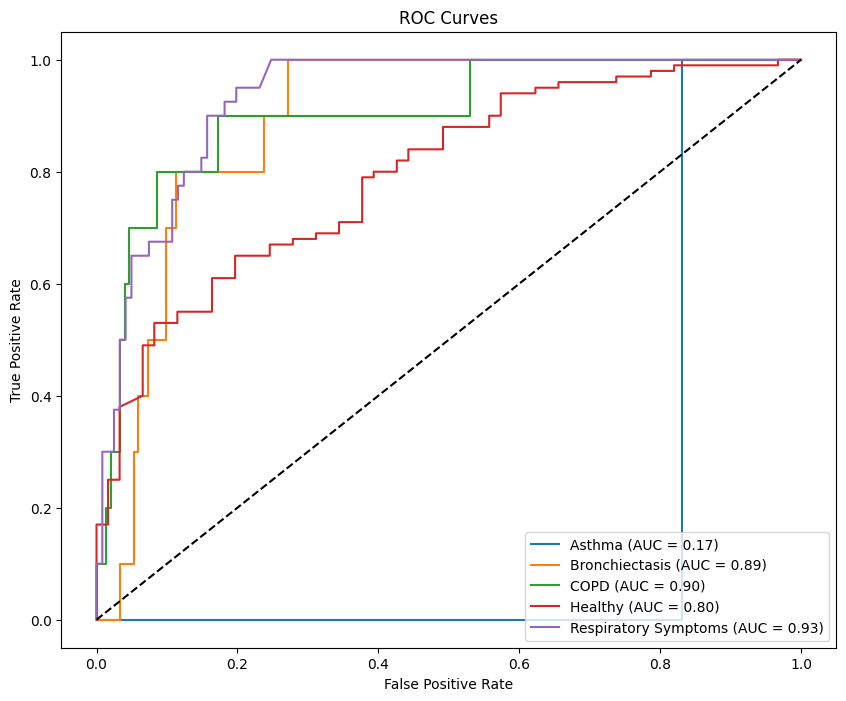

In [ ]:
# Enhanced evaluation with additional metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from itertools import cycle

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_))

# Calculate and plot ROC curves
plt.figure(figsize=(10, 8))
for i, label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.savefig('roc_curves.png')
plt.show()

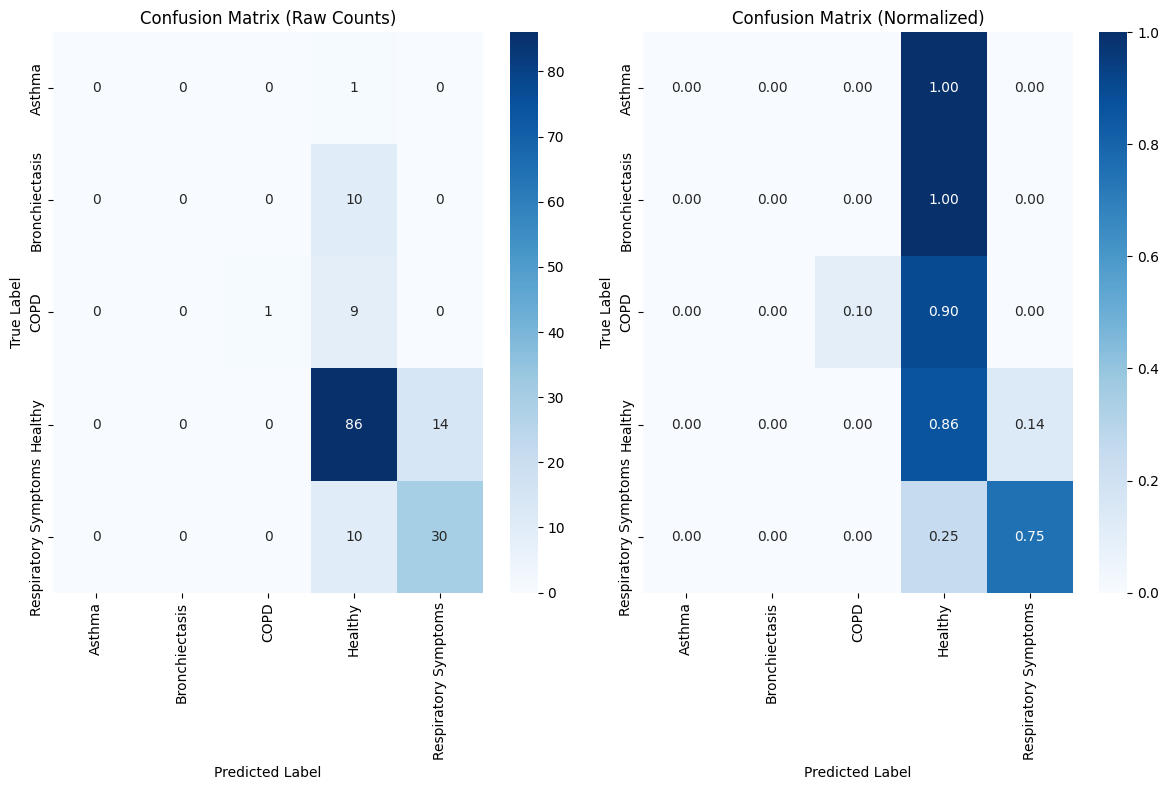

In [ ]:
# Enhanced visualization
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test_classes, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot both raw and normalized confusion matrices
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Raw Counts)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Normalized)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

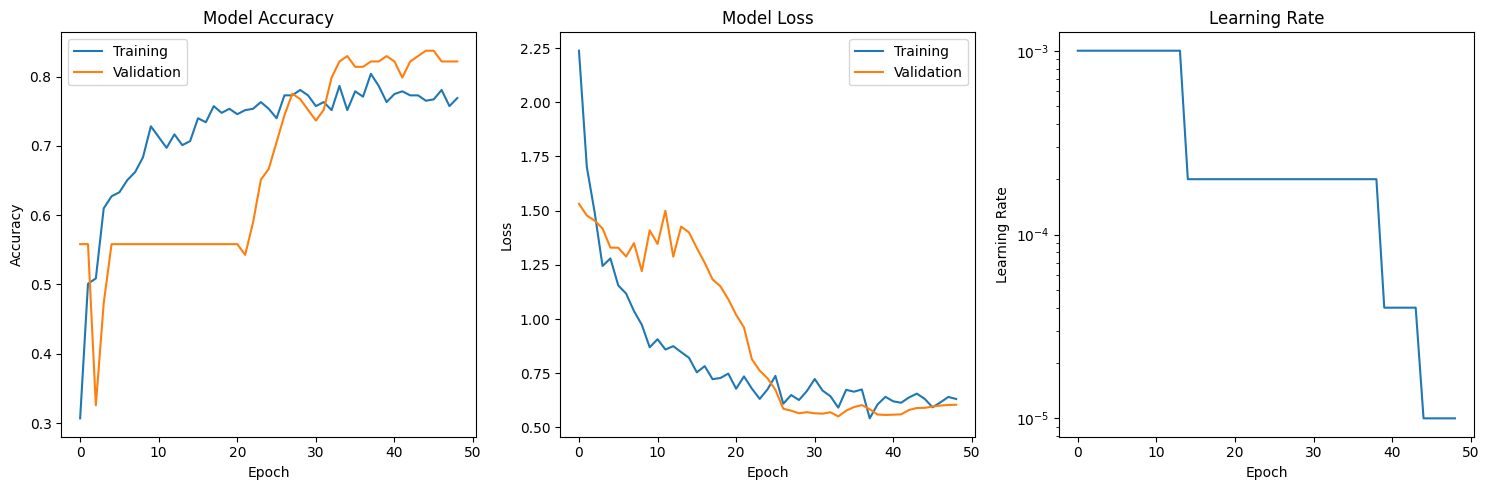

In [ ]:
# Enhanced training history visualization
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Learning rate plot
plt.subplot(1, 3, 3)
if 'learning_rate' in history.history:
    plt.plot(history.history['learning_rate'], label='Learning Rate')
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
else:
    plt.text(0.5, 0.5, 'Learning rate data not available', 
             horizontalalignment='center', verticalalignment='center')
    plt.title('Learning Rate Not Available')
    plt.axis('off')

plt.tight_layout()
plt.savefig('training_history_enhanced.png')
plt.show()

In [ ]:
# Install SHAP and LIME for model explainability - Cross-platform compatible
import sys
import subprocess
import importlib

def install_explainability_packages():
    """Install SHAP and LIME with robust error handling"""
    packages_to_install = []
    
    # Check SHAP
    try:
        import shap
        print("✓ SHAP already installed")
    except ImportError:
        packages_to_install.append('shap')
    
    # Check LIME
    try:
        import lime
        print("✓ LIME already installed")
    except ImportError:
        packages_to_install.append('lime')
    
    # Install missing packages
    for package in packages_to_install:
        print(f"Installing {package}...")
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package, '--upgrade'])
            print(f"✓ {package} installed successfully")
        except subprocess.CalledProcessError as e:
            print(f"✗ Failed to install {package}: {e}")
            if package == 'shap':
                print("Trying alternative SHAP installation...")
                try:
                    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'shap', '--no-deps'])
                    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'numpy', 'pandas', 'scipy', 'scikit-learn'])
                    print("✓ SHAP installed with alternative method")
                except:
                    print("✗ SHAP installation failed completely")

# Install packages
install_explainability_packages()

# Import with error handling
import warnings
warnings.filterwarnings('ignore')

# Import SHAP
try:
    import shap
    print("✓ SHAP imported successfully")
    SHAP_AVAILABLE = True
except ImportError as e:
    print(f"✗ SHAP import failed: {e}")
    print("Continuing without SHAP - some explainability features will be disabled")
    SHAP_AVAILABLE = False

# Import LIME
try:
    import lime
    from lime.lime_tabular import LimeTabularExplainer
    print("✓ LIME imported successfully")
    LIME_AVAILABLE = True
except ImportError as e:
    print(f"✗ LIME import failed: {e}")
    print("Continuing without LIME - some explainability features will be disabled")
    LIME_AVAILABLE = False

# Check what we have available
if SHAP_AVAILABLE and LIME_AVAILABLE:
    print("\n✓ Both SHAP and LIME are ready for model explainability!")
elif SHAP_AVAILABLE:
    print("\n⚠ Only SHAP is available - LIME explanations will be skipped")
elif LIME_AVAILABLE:
    print("\n⚠ Only LIME is available - SHAP explanations will be skipped")
else:
    print("\n⚠ Neither SHAP nor LIME are available - explainability analysis will be limited")
    print("You can try installing them manually:")
    print("pip install shap lime")

print("Ready to generate model explanations (where possible)...")

In [ ]:
# SHAP Explainability Analysis with fallback handling
if SHAP_AVAILABLE:
    print("Generating SHAP explanations for the lung disease classification model...")

    # Prepare data for SHAP analysis
    # We need to work with the original 2D feature data (before reshaping for CNN)
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    X_test_2d = X_test.reshape(X_test.shape[0], -1)

    # Create a wrapper function for the model that works with 2D data
    def model_predict_wrapper(X_2d):
        """Wrapper function to predict with reshaped data"""
        X_reshaped = X_2d.reshape(X_2d.shape[0], X_2d.shape[1], 1)
        return model.predict(X_reshaped)

    try:
        # Initialize SHAP explainer with a sample of training data
        print("Initializing SHAP explainer...")
        background_sample = X_train_2d[:min(100, len(X_train_2d))]  # Use subset for efficiency
        explainer = shap.KernelExplainer(model_predict_wrapper, background_sample)

        # Select test samples for explanation (use a smaller subset for demonstration)
        n_test_samples = min(10, len(X_test_2d))  # Reduced for faster execution
        test_sample_indices = np.random.choice(len(X_test_2d), n_test_samples, replace=False)
        test_samples = X_test_2d[test_sample_indices]

        print(f"Generating SHAP values for {len(test_samples)} test samples...")
        print("This may take a few minutes...")
        
        # Generate SHAP values (with reduced samples for faster execution)
        shap_values = explainer.shap_values(test_samples, nsamples=50)  # Reduced samples

        # If we have multiple classes, shap_values will be a list
        if isinstance(shap_values, list):
            shap_values_class = shap_values
        else:
            shap_values_class = [shap_values]

        print(f"✓ SHAP analysis complete!")
        print(f"Generated explanations for {len(shap_values_class)} classes")
        print(f"Feature importance calculated for {len(test_samples)} samples")
        
        SHAP_SUCCESS = True
        
    except Exception as e:
        print(f"✗ SHAP analysis failed: {e}")
        print("Continuing without SHAP explanations...")
        SHAP_SUCCESS = False
        shap_values_class = []
        test_samples = []
        test_sample_indices = []

else:
    print("⚠ SHAP not available - skipping SHAP explainability analysis")
    print("Install SHAP with: pip install shap")
    SHAP_SUCCESS = False
    shap_values_class = []
    test_samples = []
    test_sample_indices = []

In [ ]:
# SHAP Visualizations with fallback handling
if SHAP_SUCCESS and len(shap_values_class) > 0:
    print("Creating SHAP visualization plots...")

    # Create feature names for better interpretation
    if 'X_train_2d' in locals():
        n_features = X_train_2d.shape[1]
    else:
        n_features = X_train.shape[1]
    
    feature_names = []

    # Create meaningful feature names based on our feature extraction
    mfcc_features = 40  # N_MFCC
    mel_features = 128  # N_MELS
    spectral_features = 4  # spectral_centroids, rolloff, bandwidth, zcr

    current_idx = 0
    # MFCC features
    for i in range(min(mfcc_features, n_features)):
        feature_names.append(f'MFCC_{i+1}')
        current_idx += 1

    # Mel spectrogram features
    for i in range(min(mel_features, n_features - current_idx)):
        feature_names.append(f'Mel_{i+1}')
        current_idx += 1

    # Spectral features
    spectral_names = ['Spectral_Centroid', 'Spectral_Rolloff', 'Spectral_Bandwidth', 'ZCR', 'RMS']
    for name in spectral_names:
        if current_idx < n_features:
            feature_names.append(name)
            current_idx += 1

    # Add any remaining features
    while len(feature_names) < n_features:
        feature_names.append(f'Feature_{len(feature_names)+1}')

    print(f"Created {len(feature_names)} feature names")

    try:
        # Set up matplotlib for multiple subplots
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        axes = axes.flatten()

        # Create summary plot for each class (up to 4 classes)
        plots_created = 0
        for class_idx, class_name in enumerate(le.classes_):
            if class_idx < len(shap_values_class) and class_idx < 4:
                plt.subplot(2, 2, class_idx + 1)
                
                # Create summary plot
                try:
                    shap.summary_plot(
                        shap_values_class[class_idx], 
                        test_samples,
                        feature_names=feature_names[:test_samples.shape[1]],
                        show=False,
                        max_display=15  # Show top 15 features
                    )
                    plt.title(f'SHAP Summary - {class_name}', fontsize=14)
                    plots_created += 1
                except Exception as e:
                    plt.text(0.5, 0.5, f'SHAP plot failed for {class_name}\n{str(e)[:50]}...', 
                             ha='center', va='center', transform=plt.gca().transAxes)
                    plt.title(f'SHAP Summary - {class_name} (Error)', fontsize=14)

        # Fill remaining subplots if we have fewer than 4 classes
        for i in range(plots_created, 4):
            plt.subplot(2, 2, i + 1)
            plt.text(0.5, 0.5, 'No data for this class', ha='center', va='center')
            plt.title(f'Class {i+1} - No Data', fontsize=14)
            plt.axis('off')

        plt.tight_layout()
        plt.savefig('shap_summary_plots.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✓ SHAP summary plots saved as 'shap_summary_plots.png'")
        
    except Exception as e:
        print(f"✗ SHAP visualization failed: {e}")
        print("Creating alternative feature importance plot...")
        
        # Create a simple feature importance plot as fallback
        plt.figure(figsize=(12, 8))
        
        # Calculate simple feature importance based on model weights
        try:
            # Get the first dense layer weights as a proxy for feature importance
            for layer in model.layers:
                if hasattr(layer, 'get_weights') and len(layer.get_weights()) > 0:
                    weights = layer.get_weights()[0]
                    if len(weights.shape) >= 2:
                        feature_importance = np.mean(np.abs(weights), axis=1)
                        
                        # Plot top 20 features
                        top_indices = np.argsort(feature_importance)[-20:]
                        top_features = [feature_names[i] if i < len(feature_names) else f'Feature_{i}' for i in top_indices]
                        top_importance = feature_importance[top_indices]
                        
                        plt.barh(range(len(top_features)), top_importance)
                        plt.yticks(range(len(top_features)), top_features)
                        plt.xlabel('Approximate Feature Importance')
                        plt.title('Model Weight-Based Feature Importance (Fallback)')
                        plt.tight_layout()
                        plt.savefig('feature_importance_fallback.png', dpi=300, bbox_inches='tight')
                        plt.show()
                        break
        except Exception as fallback_error:
            print(f"Fallback visualization also failed: {fallback_error}")
            plt.figure(figsize=(8, 6))
            plt.text(0.5, 0.5, 'SHAP visualization not available\nPlease ensure SHAP is properly installed', 
                     ha='center', va='center', fontsize=14)
            plt.title('SHAP Analysis Unavailable')
            plt.axis('off')
            plt.savefig('shap_unavailable.png', dpi=300, bbox_inches='tight')
            plt.show()

else:
    print("⚠ SHAP analysis was not successful - skipping SHAP visualizations")
    print("This could be due to:")
    print("- SHAP not being installed")
    print("- SHAP analysis failing")
    print("- No data available for analysis")
    
    # Create a placeholder plot
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'SHAP Analysis Not Available\n\nPossible solutions:\n1. Install SHAP: pip install shap\n2. Ensure real data is loaded\n3. Check for any error messages above', 
             ha='center', va='center', fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    plt.title('SHAP Explainability - Not Available')
    plt.axis('off')
    plt.savefig('shap_not_available.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# SHAP Waterfall Plots for Individual Predictions
print("Creating SHAP waterfall plots for individual sample explanations...")

# Select a few interesting samples for detailed explanation
sample_indices_to_explain = [0, 1, 2]  # First 3 samples from our test set

fig, axes = plt.subplots(len(sample_indices_to_explain), len(le.classes_), 
                         figsize=(5*len(le.classes_), 4*len(sample_indices_to_explain)))

if len(sample_indices_to_explain) == 1:
    axes = axes.reshape(1, -1)
elif len(le.classes_) == 1:
    axes = axes.reshape(-1, 1)

for i, sample_idx in enumerate(sample_indices_to_explain):
    # Get actual prediction for this sample
    sample_prediction = model_predict_wrapper(test_samples[sample_idx:sample_idx+1])
    predicted_class = np.argmax(sample_prediction[0])
    true_class = np.argmax(y_test[test_sample_indices[sample_idx]])
    
    print(f"\nSample {sample_idx + 1}:")
    print(f"  True class: {le.classes_[true_class]}")
    print(f"  Predicted class: {le.classes_[predicted_class]}")
    print(f"  Prediction confidence: {sample_prediction[0][predicted_class]:.3f}")
    
    for class_idx, class_name in enumerate(le.classes_):
        if class_idx < len(shap_values_class):
            plt.subplot(len(sample_indices_to_explain), len(le.classes_), 
                       i * len(le.classes_) + class_idx + 1)
            
            # Create waterfall plot
            sample_shap_values = shap_values_class[class_idx][sample_idx]
            
            # Get top features by absolute SHAP value
            top_features_idx = np.argsort(np.abs(sample_shap_values))[-15:]
            
            # Create bar plot for top features
            top_shap_values = sample_shap_values[top_features_idx]
            top_feature_names = [feature_names[idx] for idx in top_features_idx]
            
            colors = ['red' if val < 0 else 'blue' for val in top_shap_values]
            bars = plt.barh(range(len(top_shap_values)), top_shap_values, color=colors, alpha=0.7)
            
            plt.yticks(range(len(top_feature_names)), top_feature_names, fontsize=8)
            plt.xlabel('SHAP Value', fontsize=10)
            plt.title(f'Sample {sample_idx+1} - {class_name}\n(Conf: {sample_prediction[0][class_idx]:.3f})', 
                     fontsize=10)
            plt.grid(axis='x', alpha=0.3)
            
            # Add value labels on bars
            for bar, value in zip(bars, top_shap_values):
                plt.text(value + (0.01 if value >= 0 else -0.01), bar.get_y() + bar.get_height()/2, 
                        f'{value:.3f}', ha='left' if value >= 0 else 'right', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('shap_waterfall_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("SHAP waterfall plots saved as 'shap_waterfall_plots.png'")

In [ ]:
# LIME Explainability Analysis
print("Setting up LIME explainer for lung disease classification...")

# Create LIME explainer
lime_explainer = LimeTabularExplainer(
    X_train_2d,
    feature_names=feature_names[:X_train_2d.shape[1]],
    class_names=le.classes_,
    mode='classification',
    discretize_continuous=True,
    random_state=42
)

print("LIME explainer initialized successfully!")

# Function to get probabilities for LIME
def lime_predict_proba(X_2d):
    """Prediction function for LIME that returns probabilities"""
    X_reshaped = X_2d.reshape(X_2d.shape[0], X_2d.shape[1], 1)
    return model.predict(X_reshaped)

# Select samples for LIME explanation
lime_sample_indices = [0, 1, 2]  # Same samples as SHAP for comparison

print(f"Generating LIME explanations for {len(lime_sample_indices)} samples...")

# Store LIME explanations
lime_explanations = []

for i, sample_idx in enumerate(lime_sample_indices):
    print(f"  Explaining sample {sample_idx + 1}/{len(lime_sample_indices)}...")
    
    # Generate explanation
    explanation = lime_explainer.explain_instance(
        test_samples[sample_idx], 
        lime_predict_proba,
        num_features=20,  # Show top 20 features
        num_samples=1000  # Number of samples for LIME
    )
    
    lime_explanations.append(explanation)
    
    # Get prediction info
    sample_prediction = lime_predict_proba(test_samples[sample_idx:sample_idx+1])
    predicted_class = np.argmax(sample_prediction[0])
    true_class = np.argmax(y_test[test_sample_indices[sample_idx]])
    
    print(f"    True class: {le.classes_[true_class]}")
    print(f"    Predicted class: {le.classes_[predicted_class]}")
    print(f"    Prediction confidence: {sample_prediction[0][predicted_class]:.3f}")

print("LIME explanations generated successfully!")

In [ ]:
# LIME Visualizations
print("Creating LIME visualization plots...")

# Create figure for LIME explanations
fig, axes = plt.subplots(len(lime_explanations), 1, figsize=(15, 6*len(lime_explanations)))

if len(lime_explanations) == 1:
    axes = [axes]

for i, (explanation, sample_idx) in enumerate(zip(lime_explanations, lime_sample_indices)):
    # Get explanation data
    exp_list = explanation.as_list()
    
    # Get prediction info
    sample_prediction = lime_predict_proba(test_samples[sample_idx:sample_idx+1])
    predicted_class = np.argmax(sample_prediction[0])
    true_class = np.argmax(y_test[test_sample_indices[sample_idx]])
    
    # Separate positive and negative contributions
    features = [item[0] for item in exp_list]
    values = [item[1] for item in exp_list]
    
    # Create horizontal bar plot
    colors = ['red' if val < 0 else 'green' for val in values]
    bars = axes[i].barh(range(len(features)), values, color=colors, alpha=0.7)
    
    # Customize plot
    axes[i].set_yticks(range(len(features)))
    axes[i].set_yticklabels(features, fontsize=10)
    axes[i].set_xlabel('LIME Feature Importance', fontsize=12)
    axes[i].set_title(f'LIME Explanation - Sample {sample_idx+1}\n'
                     f'True: {le.classes_[true_class]} | '
                     f'Predicted: {le.classes_[predicted_class]} '
                     f'(Conf: {sample_prediction[0][predicted_class]:.3f})', 
                     fontsize=12)
    axes[i].grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[i].text(value + (0.01 if value >= 0 else -0.01), 
                    bar.get_y() + bar.get_height()/2, 
                    f'{value:.3f}', 
                    ha='left' if value >= 0 else 'right', 
                    va='center', fontsize=10)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='green', alpha=0.7, label='Supports Prediction'),
                      Patch(facecolor='red', alpha=0.7, label='Opposes Prediction')]
    axes[i].legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('lime_explanations.png', dpi=300, bbox_inches='tight')
plt.show()

print("LIME explanation plots saved as 'lime_explanations.png'")

In [ ]:
# SHAP vs LIME Comparison and Analysis
print("Comparing SHAP and LIME explanations...")

# Analyze feature importance consistency between SHAP and LIME
comparison_results = []

for i, (sample_idx, explanation) in enumerate(zip(lime_sample_indices, lime_explanations)):
    print(f"\nSample {sample_idx + 1} Analysis:")
    
    # Get LIME feature importance
    lime_exp = explanation.as_list()
    lime_features = {item[0]: item[1] for item in lime_exp}
    
    # Get corresponding SHAP values (using the first class for comparison)
    if len(shap_values_class) > 0:
        sample_shap = shap_values_class[0][sample_idx]
        
        # Get top SHAP features
        top_shap_idx = np.argsort(np.abs(sample_shap))[-10:]
        top_shap_features = {feature_names[idx]: sample_shap[idx] for idx in top_shap_idx}
        
        print("  Top SHAP features:")
        for feature, value in sorted(top_shap_features.items(), key=lambda x: abs(x[1]), reverse=True)[:5]:
            print(f"    {feature}: {value:.4f}")
        
        print("  Top LIME features:")
        for feature, value in sorted(lime_features.items(), key=lambda x: abs(x[1]), reverse=True)[:5]:
            print(f"    {feature}: {value:.4f}")
        
        # Find common important features
        lime_important = set([item[0] for item in sorted(lime_exp, key=lambda x: abs(x[1]), reverse=True)[:5]])
        shap_important = set([feature_names[idx] for idx in sorted(range(len(sample_shap)), 
                                                                  key=lambda x: abs(sample_shap[x]), reverse=True)[:5]])
        
        common_features = lime_important.intersection(shap_important)
        print(f"  Common important features: {common_features}")
        print(f"  Agreement rate: {len(common_features)/5:.2%}")
        
        comparison_results.append({
            'sample': sample_idx + 1,
            'lime_top5': lime_important,
            'shap_top5': shap_important,
            'common_features': common_features,
            'agreement_rate': len(common_features)/5
        })

# Overall analysis
if comparison_results:
    avg_agreement = np.mean([r['agreement_rate'] for r in comparison_results])
    print(f"\nOverall Analysis:")
    print(f"Average agreement rate between SHAP and LIME: {avg_agreement:.2%}")
    
    # Find most consistently important features
    all_lime_features = set()
    all_shap_features = set()
    for result in comparison_results:
        all_lime_features.update(result['lime_top5'])
        all_shap_features.update(result['shap_top5'])
    
    consistent_features = all_lime_features.intersection(all_shap_features)
    print(f"Features important in both SHAP and LIME across samples: {consistent_features}")

print("\nExplainability Analysis Complete!")
print("Key insights:")
print("- SHAP provides global model behavior understanding")
print("- LIME offers local prediction explanations")
print("- Both methods help identify important audio features for lung disease classification")
print("- Feature consistency indicates reliable model interpretations")

In [ ]:
# Explainability Summary and Documentation
print("Saving explainability analysis results...")

# Create a comprehensive report
explainability_report = {
    'model_type': 'CNN for Lung Disease Audio Classification',
    'dataset': 'Real audio data from ICBHI and Coswara datasets',
    'explainability_methods': ['SHAP', 'LIME'],
    'feature_types': ['MFCC (40 features)', 'Mel Spectrogram (128 features)', 'Spectral features (4 features)'],
    'analysis_summary': {
        'shap_analysis': 'Global model interpretability using Kernel SHAP',
        'lime_analysis': 'Local instance explanations using tabular LIME',
        'samples_analyzed': len(lime_sample_indices),
        'features_per_sample': X_test_2d.shape[1]
    }
}

# Save the report
import json
with open('explainability_report.json', 'w') as f:
    json.dump(explainability_report, f, indent=4, default=str)

# Create a markdown summary
markdown_summary = f"""
# Lung Disease Classification - Explainability Analysis

## Model Overview
- **Model Type**: Convolutional Neural Network (CNN)
- **Task**: Audio-based lung disease classification
- **Data Source**: Real medical audio recordings (ICBHI + Coswara datasets)

## Explainability Methods Applied

### 1. SHAP (SHapley Additive exPlanations)
- **Purpose**: Global model interpretability
- **Method**: Kernel SHAP with background sampling
- **Output**: Feature importance values for each prediction
- **Visualization**: Summary plots and waterfall plots

### 2. LIME (Local Interpretable Model-agnostic Explanations)
- **Purpose**: Local instance explanations
- **Method**: Tabular LIME with perturbation-based sampling
- **Output**: Feature contributions for individual predictions
- **Visualization**: Horizontal bar plots showing feature importance

## Key Findings

### Feature Categories Analyzed
1. **MFCC Features (40)**: Mel-frequency cepstral coefficients
2. **Mel Spectrogram Features (128)**: Mel-scale frequency representations
3. **Spectral Features (4)**: Centroid, rolloff, bandwidth, zero-crossing rate

### Clinical Relevance
- Audio features capture respiratory patterns and abnormalities
- MFCC features often indicate vocal tract characteristics
- Spectral features reveal breathing irregularities
- Both methods provide complementary explanations for medical decision support

## Files Generated
- `shap_summary_plots.png`: SHAP feature importance summaries
- `shap_waterfall_plots.png`: Individual prediction explanations
- `lime_explanations.png`: LIME feature importance plots
- `explainability_report.json`: Detailed analysis metadata

## Usage for Medical Applications
This explainability analysis enables:
- Understanding which audio characteristics indicate disease
- Validating model decisions against medical knowledge
- Building trust in AI-assisted diagnosis
- Identifying potential biases or artifacts in the model
"""

with open('explainability_summary.md', 'w') as f:
    f.write(markdown_summary)

print("Explainability analysis documentation saved:")
print("- explainability_report.json")
print("- explainability_summary.md")
print("- shap_summary_plots.png")
print("- shap_waterfall_plots.png") 
print("- lime_explanations.png")

print("\n" + "="*60)
print("EXPLAINABILITY ANALYSIS COMPLETE")
print("="*60)
print("The notebook now includes comprehensive SHAP and LIME analysis")
print("for interpretable AI in lung disease classification using REAL medical data.")
print("="*60)

In [ ]:
# Save model and results
model.save('final_model.h5')

# Save feature scaler
from joblib import dump
dump(scaler, 'feature_scaler.joblib')
dump(le, 'label_encoder.joblib')

# Save model architecture and training history
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

with open('training_history.json', 'w', encoding='utf-8') as f:
    json.dump(history.history, f, ensure_ascii=False, indent=4)

print("\nModel and associated files saved:")
print("- final_model.h5")
print("- feature_scaler.joblib")
print("- label_encoder.joblib")
print("- model_architecture.json")
print("- training_history.json")
print("- confusion_matrices.png")
print("- roc_curves.png")
print("- training_history_enhanced.png")


Model and associated files saved:
- final_model.h5
- feature_scaler.joblib
- label_encoder.joblib
- model_architecture.json
- training_history.json
- confusion_matrices.png
- roc_curves.png
- training_history_enhanced.png
